**Business Problem**: 
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


# Initial Exploration


In [4]:
#Checking the shape of the dataset which comes out to be 550068 rows and 10 columns.

df.shape

(550068, 10)

In [5]:
# This tells the number of unique values in each column.

for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB



1.   There are 10 columns in tha dataset with their Dtype seggregation as 5 object type and 5 int64 type.
2.   There are total of 550068 entries/rows in tha dataset and they have no null values in them.





# Missing values and outliers detection.

In [7]:
#Checking the null values in the dataset which comes out to be None.

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Theres a big difference between mean and median of purchase amounts which implies there are several outliers in the purchase column.

In [9]:
#Since "Purchase" column is the only continouos column in the data, directly applying describe() to it and checking difference between mean and median.

df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

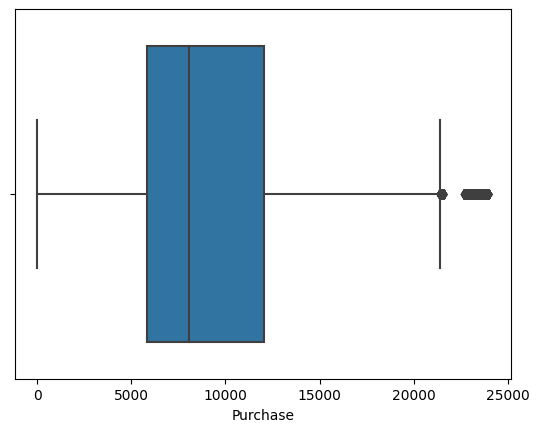

In [157]:
#Checking for outliers in Purchase column and it has quite a few of them.

sns.boxplot(x= df["Purchase"])

plt.show()

# Non-Graphical Analysis

In [11]:
df.groupby(["Gender","Marital_Status"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean"))

Mean_Purchase
Gender Marital_Status               
F      0                 8679.845815
       1                 8810.249789
M      0                 9453.756740
       1                 9413.817605

*   The above table tells that males have higher mean expenditure than females irrespective of being married or un-married.
*   An unmarried male has the highest expenditure among all the categories





In [12]:
df.groupby("Age").agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean"))

,Mean_Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


*   Mean expenditure for different age groups aren't very varying but highest spending age group is 51-55 age group.




In [13]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [93]:
df.groupby(["City_Category"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean"))

,Mean_Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


The highest mean expenditure is of people living in city category "C" followed by "B" and finally closely followed by "A" category.

In [15]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [97]:
df.groupby("Occupation").agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean")).sort_values(by="Mean_Purchase",ascending=False)

,Mean_Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


The above table tells that the highest spending occupation is 17th numbered occupation with mean spending of 9821.47 and lowest spending occupation is 9th numbered with mean spending of 8637.743

In [17]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df["Product_Category"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [99]:
df.groupby("Product_Category").agg(Mean_Purchase=pd.NamedAgg(column="Purchase",aggfunc="mean")).sort_values(by="Mean_Purchase",ascending=False)

,Mean_Purchase
Product_Category,
10,19675.570927
7,16365.689600
6,15838.478550
9,15537.375610
15,14780.451828
16,14766.037037
1,13606.218596
14,13141.625739
2,11251.935384




*   People spends the most on product category 10 with mean spending of 19675.57




In [19]:
df_male = df[df["Gender"]=="M"]
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [20]:
df_male.groupby("Age").agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean"))

,Mean_Purchase
Age,
0-17,9235.173670
18-25,9440.942971
26-35,9410.337578
36-45,9453.193643
46-50,9357.471509
51-55,9705.094802
55+,9438.195603




*   Among males only, the highest spending age group is 51-55 age group again but all the other age groups are very close to each other. The difference from the highest is around 400-500 max.



In [22]:
df_female = df[df["Gender"]=="F"]
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [23]:
df_female.groupby("Age").agg(Mean_Purchase=pd.NamedAgg(column="Purchase",aggfunc="mean"))

,Mean_Purchase
Age,
0-17,8338.771985
18-25,8343.180201
26-35,8728.251754
36-45,8959.844056
46-50,8842.098947
51-55,9042.449666
55+,9007.036199


In females also the highest spending age group is 51-55 age group.

In [24]:
df_male.nunique()

User_ID                        4225
Product_ID                     3588
Gender                            1
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      17547
dtype: int64

In [25]:
df_female.nunique()

User_ID                        1666
Product_ID                     3367
Gender                            1
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      14704
dtype: int64

In [26]:
print("Purchase_Population_mean_male",":",df_male["Purchase"].mean().round(2))

Purchase_Population_mean_male : 9437.53


In [27]:
print("Purchase_Population_std_male",":",df_male["Purchase"].std().round(2))

Purchase_Population_std_male : 5092.19


In [28]:
print("Purchase_Population_mean_female",":",df_female["Purchase"].mean().round(2))

Purchase_Population_mean_female : 8734.57


In [29]:
print("Purchase_Population_std_female",":",df_female["Purchase"].std().round(2))

Purchase_Population_std_female : 4767.23


# Confidence Intervals for male purchases using bootstrapping

<Axes: ylabel='Count'>

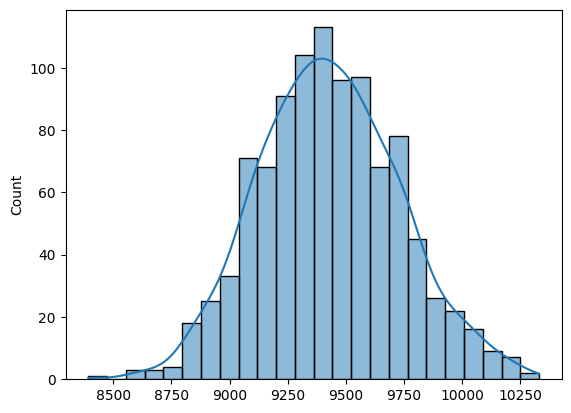

In [30]:
purchase_sample_means_males=[]
for reps in range(1000):
  purchase_sample_males = np.random.choice(df_male["Purchase"],size=300)
  purchase_mean_males = purchase_sample_males.mean()
  purchase_sample_means_males.append(purchase_mean_males)

# print(bootstrapped_sample_means)
sns.histplot(purchase_sample_means_males,kde=True)


In [31]:
np.mean(purchase_sample_means_males).round(2)

9428.06

In [32]:
np.std(purchase_sample_means_males).round(2)

301.2

## 95% Confidence Interval.

In [33]:
np.percentile(purchase_sample_means_males,[2.5,97.5]).round(2)

array([ 8859.52, 10043.71])

In [34]:
#Confirming the interval using the formula.

left = np.mean(purchase_sample_means_males).round(2)-2*np.std(purchase_sample_means_males).round(2)
right = np.mean(purchase_sample_means_males).round(2)+2*np.std(purchase_sample_means_males).round(2)
print("Lower Limit :",left)
print("Upper Limit :",right)

Lower Limit : 8825.66
Upper Limit : 10030.46


# Confidence Interval for female purchases using bootstrapping.

<Axes: ylabel='Count'>

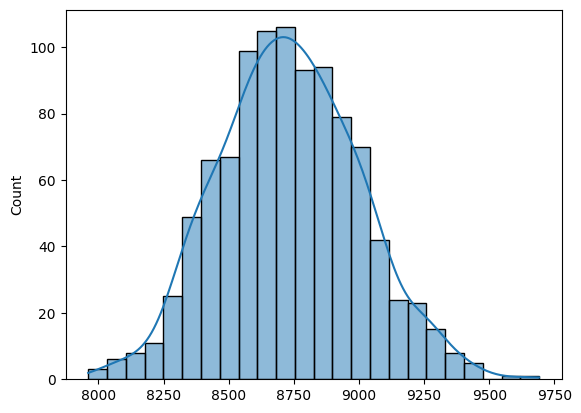

In [35]:
purchase_sample_means_females=[]
for reps in range(1000):
  purchase_sample_females = np.random.choice(df_female["Purchase"],size=300)
  purchase_mean_females = purchase_sample_females.mean()
  purchase_sample_means_females.append(purchase_mean_females)

sns.histplot(purchase_sample_means_females,kde=True)

In [36]:
np.mean(purchase_sample_means_females)

8733.133703333333

In [37]:
np.std(purchase_sample_means_females)

268.70335046847725

## 95% Confidence Interval.

In [38]:
np.percentile(purchase_sample_means_females,[2.5,97.5]).round(2)

array([8239.53, 9275.7 ])

In [39]:
#Confirming the interval using the formula.

left = np.mean(purchase_sample_means_females).round(2)-2*np.std(purchase_sample_means_females).round(2)
right = np.mean(purchase_sample_means_females).round(2)+2*np.std(purchase_sample_means_females).round(2)
print("Lower Limit :",left)
print("Upper Limit :",right)

Lower Limit : 8195.73
Upper Limit : 9270.529999999999


# Confidence interval using Central Limit Theorem for males purchase

In [40]:
df_male["Purchase"]

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

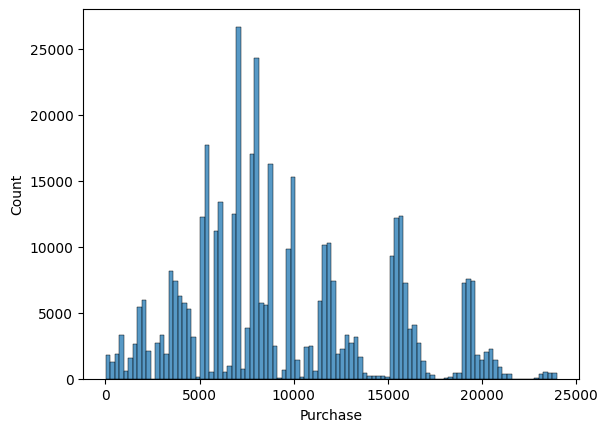

In [41]:
sns.histplot(df_male["Purchase"],bins=100)

<Axes: ylabel='Count'>

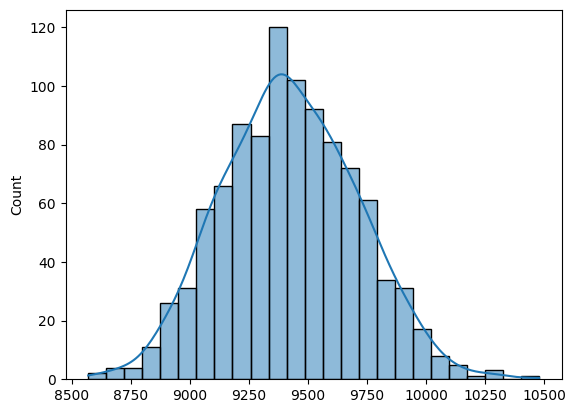

In [42]:
#Plotting means of Purchase of males for different samples(300) from the population.

sample_size=300
sample_mean_collection_males=[]
for person in range(1000):
  sample_male = df_male["Purchase"].sample(sample_size)
  sample_means_male = sample_male.mean()
  sample_mean_collection_males.append(sample_means_male)
sns.histplot(sample_mean_collection_males,kde=True)

In [43]:
#Mean expenditure of males.

mu_m = np.mean(sample_mean_collection_males)
mu_m

9423.201816666668

In [44]:
#Standard deviation from the mean.

std_m = np.std(sample_mean_collection_males)
std_m

286.57238566198197

## 95% Confidence Interval

In [45]:
#For 95% finding the z-score
z_95 = norm.ppf(0.975)
z_95

1.959963984540054

In [46]:
left = mu_m-(z_95*std_m)
right = mu_m+(z_95*std_m)
print(left)
print(right)

8861.530261805461
9984.873371527874


This implies that the mean expenditure of males (i.e. population mean) lies within **[8861.53,10007.641]** and we can say that with 95% confidence.

In [47]:
np.percentile(sample_mean_collection_males,[2.5,97.5]).round(2)

array([8883.21, 9980.06])

## 90% Confidence Interval

In [48]:
z_90= norm.ppf(0.95)   # Fniding z-score for 90%
left = mu_m-(z_90*std_m)
right = mu_m+(z_90*std_m)
print(left)
print(right)

8951.832188726421
9894.571444606914


This implies that the mean expenditure of males (i.e. population mean) lies within **[8965.052,9916.505]** and we can say that with 90% confidence.

# Confidence interval using Central Limit Theorem for female purchase.

In [49]:
df_female["Purchase"]

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

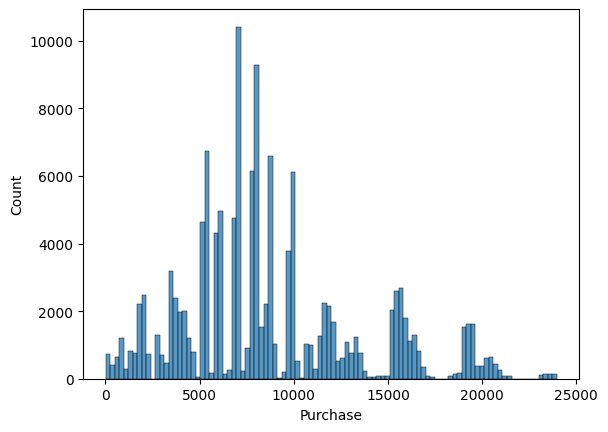

In [50]:
sns.histplot(df_female["Purchase"],bins=100)

<Axes: ylabel='Count'>

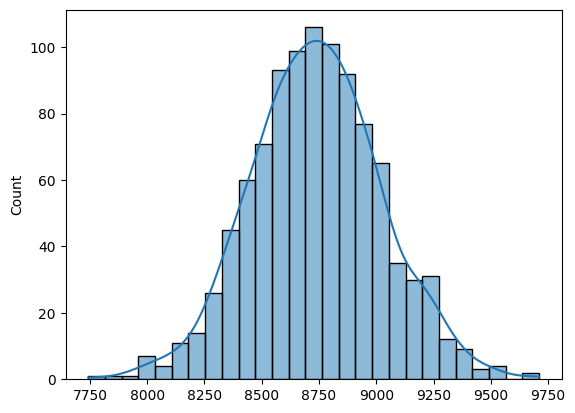

In [51]:
#Plotting means of Purchase of females for different samples(300) from the population.

sample_size=300
sample_mean_collection_females=[]
for person in range(1000):
  sample_female = df_female["Purchase"].sample(sample_size)
  sample_means_female = sample_female.mean()
  sample_mean_collection_females.append(sample_means_female)
sns.histplot(sample_mean_collection_females,kde=True)

In [52]:
#Mean expenditure of females.

mu_f = np.mean(sample_mean_collection_females)
mu_f

8739.070163333334

In [53]:
#Standard deviation from the mean.

std_f = np.std(sample_mean_collection_females)
std_f

283.30300062427466

## 95% Confidence Interval

In [54]:
z_95= norm.ppf(0.975)
left = mu_f-(z_95*std_f)
right = mu_f+(z_95*std_f)
print(left)
print(right)

8183.806485397627
9294.333841269041


This implies that the average expenditure of females (i.e. population mean) lies within **[8200.669,9255.12]** and we can say that with 95% confidence.

## 90% Confidence Interval.

In [55]:
z_90= norm.ppf(0.95)
left = mu_f-(z_90*std_f)
right = mu_f+(z_90*std_f)
print(left)
print(right)

8273.07819523026
9205.062131436407


This implies that the average expenditure of females (i.e. population mean) lies within **[8285.433,9170.354]** and we can say that with 90% confidence.

# Confidence Interval of Purchase amount for unmarried people.

In [56]:
#Creating dataset which contains unmarried people only.

df_unmarried = df[df["Marital_Status"]==0]
df_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Purchase', ylabel='Count'>

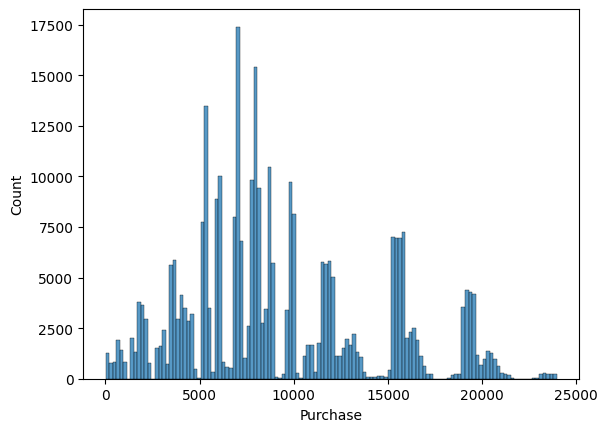

In [57]:
#Plotting the purchase amount distribution for unmarried people.

sns.histplot(x = df_unmarried["Purchase"])

<Axes: ylabel='Count'>

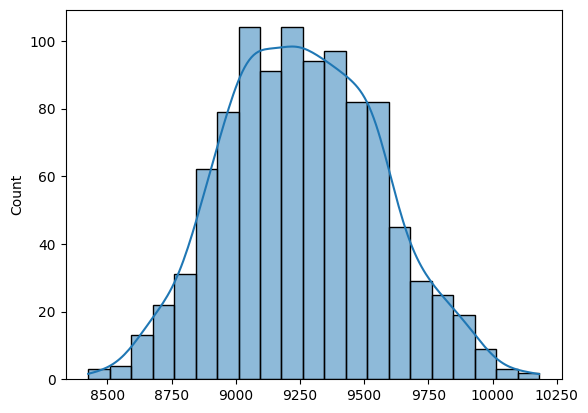

In [58]:
#Plotting means of expenditure of unmarried peolpe for different samples(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_unmarried=[]
for person in range(1000):
  sample_unmarried = df_unmarried["Purchase"].sample(sample_size)
  sample_means_unmarried = sample_unmarried.mean()
  sample_mean_collection_unmarried.append(sample_means_unmarried)
sns.histplot(sample_mean_collection_unmarried,kde=True)

In [59]:
#Mean expenditure of unmarried people.

mu_unm = np.mean(sample_mean_collection_unmarried)
mu_unm

9262.317203333334

In [60]:
#Standard deviation from the mean.

std_unm = np.std(sample_mean_collection_unmarried)
std_unm

300.63317131024723

## 95% Confidence Interval

In [61]:
z_95= norm.ppf(0.975)
left = mu_unm-(z_95*std_unm)
right = mu_unm+(z_95*std_unm)
print(left)
print(right)

8673.08701500719
9851.547391659478


This implies that the average expenditure of unmarried people (i.e. population mean) lies within **[8707.58,9838.49]** and we can say that with 95% confidence.

## 90% Confidence Interval

In [62]:
z_90= norm.ppf(0.95)
left = mu_unm-(z_90*std_unm)
right = mu_unm+(z_90*std_unm)
print(left)
print(right)

8767.81964112175
9756.814765544917


This implies that the average expenditure of unmarried people (i.e. population mean) lies within **[8798.49,9747.58]** and we can say that with 95% confidence.

# Confidence Interval of Purchase amount for married people.

In [63]:
#Creating dataset which contains married people only.

df_married = df[df["Marital_Status"]==1]
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


<Axes: ylabel='Count'>

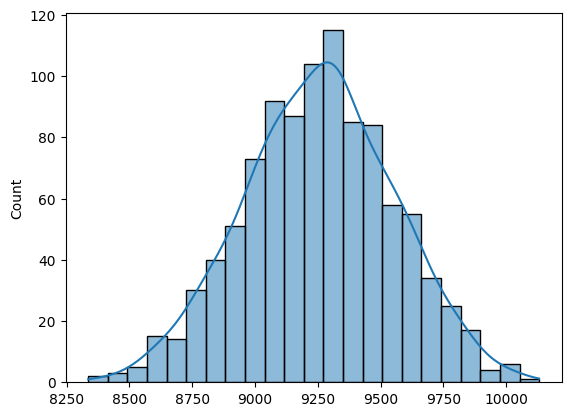

In [64]:
#Plotting means of expenditure of married peolpe for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_married=[]
for person in range(1000):
  sample_married = df_married["Purchase"].sample(sample_size)
  sample_means_married = sample_married.mean()
  sample_mean_collection_married.append(sample_means_married)
sns.histplot(sample_mean_collection_married,kde=True)

In [65]:
#Mean expenditure of married people.

mu_marr = np.mean(sample_mean_collection_married)
mu_marr

9255.48604

In [66]:
#Standard deviation from the mean.

std_marr = np.std(sample_mean_collection_married)
std_marr

296.8948536838637

## 95% Confidence Interval

In [67]:
z_95= norm.ppf(0.975)
left = mu_marr-(z_95*std_marr)
right = mu_marr+(z_95*std_marr)
print(left)
print(right)

8673.582819584339
9837.38926041566


## 90% Confidence Interval

In [68]:
z_90= norm.ppf(0.95)
left = mu_marr-(z_90*std_marr)
right = mu_marr+(z_90*std_marr)
print(left)
print(right)

8767.13746309487
9743.83461690513


# Confidence Interval of purchase amount for different age groups.

In [70]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [71]:
#Creating datasets of different age groups.

df_0_to_17 = df[df["Age"]== "0-17"]
df_18_to_25 = df[df["Age"]== "18-25"]
df_26_to_35 = df[df["Age"]== "26-35"]
df_36_to_50 = df[(df["Age"]== "36-45") | (df["Age"]== "46-50") ]
df_50_plus = df[(df["Age"]== "51-55") | (df["Age"]== "55+")]
df_50_plus

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,8851
...,...,...,...,...,...,...,...,...,...,...
550030,1005980,P00372445,M,55+,1,C,3,0,20,376
550037,1005993,P00370293,F,51-55,20,C,1,1,19,62
550042,1006002,P00371644,M,51-55,0,C,1,1,20,243
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368


## 95% Confidence Interval for age group 0-17

<Axes: ylabel='Count'>

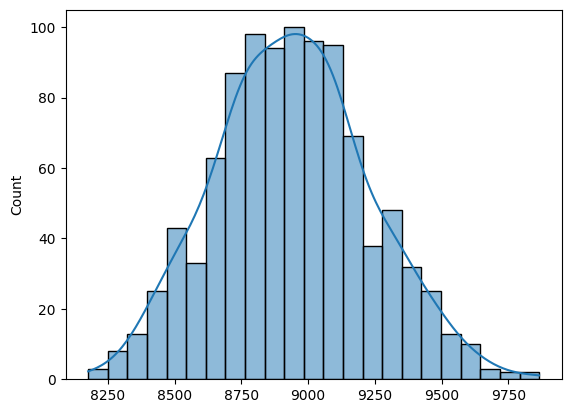

In [72]:
#Plotting means of expenditure of 0-17 age group people for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_0_to_17=[]
for person in range(1000):
  sample_0_to_17 = df_0_to_17["Purchase"].sample(sample_size)
  sample_means_0_to_17 = sample_0_to_17.mean()
  sample_mean_collection_0_to_17.append(sample_means_0_to_17)
sns.histplot(sample_mean_collection_0_to_17,kde=True)

In [73]:
#Mean expenditure of 0-17 age group people and standard deviation from the mean 

mu_0_to_17 = np.mean(sample_mean_collection_0_to_17)
std_0_to_17 = np.std(sample_mean_collection_0_to_17)
print("mean :",mu_0_to_17)
print("std :",std_0_to_17)

mean : 8941.057383333333
std : 287.47901499968026


In [74]:
z_95= norm.ppf(0.975)
left = mu_0_to_17-(z_95*std_0_to_17)
right = mu_0_to_17+(z_95*std_0_to_17)
print("Confidence Interval :","[",left,",",right,"]")


Confidence Interval : [ 8377.60886762291 , 9504.505899043756 ]


## 95% Confidence Interval for age group 18-25 

In [75]:
#Means of expenditure of 18-25 age group people for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_18_to_25=[]
for person in range(1000):
  sample_18_to_25 = df_18_to_25["Purchase"].sample(sample_size)
  sample_means_18_to_25 = sample_18_to_25.mean()
  sample_mean_collection_18_to_25.append(sample_means_18_to_25)

print(sample_mean_collection_18_to_25)

[9104.763333333334, 9032.48, 9144.883333333333, 9170.463333333333, 9137.99, 8451.343333333334, 8834.063333333334, 9159.223333333333, 9416.526666666667, 9213.816666666668, 9206.053333333333, 8533.99, 8950.47, 9018.78, 9257.673333333334, 9232.16, 9564.343333333334, 8902.916666666666, 8915.403333333334, 9232.88, 8890.82, 9481.203333333333, 8851.753333333334, 9584.186666666666, 9146.706666666667, 8983.356666666667, 9056.823333333334, 9232.89, 9119.073333333334, 9350.536666666667, 9467.993333333334, 9339.55, 9257.133333333333, 8782.163333333334, 9362.103333333333, 8847.226666666667, 9412.48, 8979.916666666666, 9317.713333333333, 9216.39, 8429.263333333334, 8850.173333333334, 9272.923333333334, 9019.083333333334, 9471.876666666667, 8611.076666666666, 8943.343333333334, 9063.066666666668, 9551.91, 9255.486666666666, 8909.7, 9179.563333333334, 9380.863333333333, 9245.286666666667, 9100.566666666668, 9199.023333333333, 9585.473333333333, 9561.55, 8970.836666666666, 9126.323333333334, 9376.47333

In [76]:
#Mean expenditure of 18-25 age group people and standard deviation from the mean

mu_18_to_25 = np.mean(sample_mean_collection_18_to_25)
std_18_to_25 = np.std(sample_mean_collection_18_to_25)
print("mean :",mu_18_to_25)
print("std :",std_18_to_25)

mean : 9172.336726666666
std : 296.9299426563945


In [77]:
z_95= norm.ppf(0.975)
left = mu_18_to_25-(z_95*std_18_to_25)
right = mu_18_to_25+(z_95*std_18_to_25)
print("Confidence Interval :","[",left,",",right,"]")

Confidence Interval : [ 8590.36473312859 , 9754.308720204743 ]


## 95% Confidence Interval for age group 26-35

In [78]:
#Means of expenditure of 26-35 age group people for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_26_to_35=[]
for person in range(1000):
  sample_26_to_35 = df_26_to_35["Purchase"].sample(sample_size)
  sample_means_26_to_35 = sample_26_to_35.mean()
  sample_mean_collection_26_to_35.append(sample_means_26_to_35)

print(sample_mean_collection_26_to_35)

[8982.41, 9523.516666666666, 8669.643333333333, 9342.173333333334, 9003.306666666667, 9370.476666666667, 9490.156666666666, 8893.956666666667, 9735.766666666666, 9539.986666666666, 8946.283333333333, 8909.263333333334, 9554.06, 9420.313333333334, 9151.74, 9669.166666666666, 9733.946666666667, 9559.046666666667, 9351.083333333334, 9324.733333333334, 9188.383333333333, 9461.86, 9129.563333333334, 9298.06, 9469.3, 9400.31, 9169.426666666666, 9031.853333333333, 9243.593333333334, 9179.586666666666, 8846.63, 9653.723333333333, 9238.986666666666, 9364.586666666666, 9367.203333333333, 9329.463333333333, 8815.31, 9358.566666666668, 9248.676666666666, 9264.053333333333, 8838.483333333334, 9333.886666666667, 8789.926666666666, 9644.97, 9500.216666666667, 8785.243333333334, 9169.733333333334, 9389.083333333334, 9509.41, 8972.37, 9656.796666666667, 9325.65, 8777.11, 9269.683333333332, 9350.05, 8901.816666666668, 9216.593333333334, 9349.566666666668, 9131.31, 9306.163333333334, 9027.556666666667, 9

In [79]:
#Mean expenditure of 18-25 age group people and standard deviation from the mean

mu_26_to_35 = np.mean(sample_mean_collection_26_to_35)
std_26_to_35 = np.std(sample_mean_collection_26_to_35)
print("mean :",mu_26_to_35)
print("std :",std_26_to_35)

mean : 9256.598303333334
std : 290.2024155196951


In [80]:
z_95= norm.ppf(0.975)
left = mu_26_to_35-(z_95*std_26_to_35)
right = mu_26_to_35+(z_95*std_26_to_35)
print("Confidence Interval :","[",left,",",right,"]")

Confidence Interval : [ 8687.812020688205 , 9825.384585978463 ]


## 95% Confidence Interval for age group 36-50

In [81]:
#Means of expenditure of 36-50 age group people for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_36_to_50=[]
for person in range(1000):
  sample_36_to_50 = df_36_to_50["Purchase"].sample(sample_size)
  sample_means_36_to_50 = sample_36_to_50.mean()
  sample_mean_collection_36_to_50.append(sample_means_36_to_50)

print(sample_mean_collection_36_to_50)

[8796.21, 9162.066666666668, 9870.09, 8985.796666666667, 9501.876666666667, 9270.563333333334, 9312.57, 9666.213333333333, 9145.606666666667, 9039.493333333334, 9144.24, 9833.476666666667, 9634.543333333333, 8789.923333333334, 9300.873333333333, 9245.28, 9324.84, 9237.79, 9128.88, 9741.856666666667, 9265.78, 9010.22, 9257.946666666667, 9553.923333333334, 9310.03, 9506.35, 9949.2, 9390.836666666666, 9305.303333333333, 9547.683333333332, 9394.706666666667, 9853.186666666666, 9251.086666666666, 9544.956666666667, 9175.623333333333, 9229.896666666667, 9030.773333333333, 9495.92, 9010.483333333334, 9480.21, 9552.01, 9168.253333333334, 9016.256666666666, 8962.103333333333, 9589.623333333333, 9648.673333333334, 9034.6, 9374.083333333334, 9512.586666666666, 9135.966666666667, 9031.1, 9330.61, 8994.883333333333, 9570.206666666667, 9395.726666666667, 9039.973333333333, 8927.49, 9339.0, 9570.633333333333, 8695.2, 8974.466666666667, 8962.886666666667, 9327.973333333333, 9604.276666666667, 9788.316

In [82]:
#Mean expenditure of 36-50 age group people and standard deviation from the mean

mu_36_to_50 = np.mean(sample_mean_collection_36_to_50)
std_36_to_50 = np.std(sample_mean_collection_36_to_50)
print("mean :",mu_36_to_50)
print("std :",std_36_to_50)

mean : 9304.868923333333
std : 295.4310478309179


In [83]:
z_95= norm.ppf(0.975)
left = mu_36_to_50-(z_95*std_36_to_50)
right = mu_36_to_50+(z_95*std_36_to_50)
print("Confidence Interval :","[",left,",",right,"]")

Confidence Interval : [ 8725.834709669803 , 9883.903136996863 ]


## 95% Confidence Interval for age group 50+

In [84]:
#Means of expenditure of 50+ age group people for different sample sets(1000 of 300 elements) from the population.

sample_size=300
sample_mean_collection_50_plus=[]
for person in range(1000):
  sample_50_plus = df_50_plus["Purchase"].sample(sample_size)
  sample_means_50_plus = sample_50_plus.mean()
  sample_mean_collection_50_plus.append(sample_means_50_plus)

print(sample_mean_collection_50_plus) 

[9552.11, 9241.07, 9380.83, 9143.256666666666, 9529.183333333332, 9448.243333333334, 9658.21, 9138.826666666666, 9586.173333333334, 9825.9, 9804.643333333333, 9803.136666666667, 9849.663333333334, 9737.173333333334, 9108.846666666666, 9662.19, 9585.603333333333, 9312.19, 9707.456666666667, 9903.886666666667, 9372.286666666667, 9921.356666666667, 9637.87, 9237.813333333334, 9361.643333333333, 9404.706666666667, 9919.02, 9639.03, 9835.71, 9341.123333333333, 9296.166666666666, 9682.303333333333, 9932.11, 9662.283333333333, 9471.06, 9571.313333333334, 10062.093333333334, 9847.47, 9136.833333333334, 9384.013333333334, 9346.923333333334, 9890.763333333334, 9121.26, 9411.323333333334, 9558.233333333334, 9200.316666666668, 9916.11, 9295.48, 9391.163333333334, 9680.04, 9275.913333333334, 9380.263333333334, 9340.803333333333, 9469.713333333333, 8912.4, 9122.353333333333, 9129.306666666667, 8956.076666666666, 9562.0, 9847.206666666667, 8927.286666666667, 9506.403333333334, 9345.743333333334, 1003

In [85]:
#Mean expenditure of 50+ age group people and standard deviation from the mean

mu_50_plus = np.mean(sample_mean_collection_50_plus)
std_50_plus = np.std(sample_mean_collection_50_plus)
print("mean :",mu_50_plus)
print("std :",std_50_plus)

mean : 9466.787046666666
std : 298.8123925011776


In [86]:
z_95= norm.ppf(0.975)
left = mu_50_plus-(z_95*std_50_plus)
right = mu_50_plus+(z_95*std_50_plus)
print("Confidence Interval :","[",left,",",right,"]")

Confidence Interval : [ 8881.125519230112 , 10052.44857410322 ]


# Graphical Analysis

In [100]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [112]:
df_age_gender = df.groupby(["Age","Gender"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase",aggfunc="mean"))
df_age_gender.reset_index(inplace=True)
df_age_gender
# sns.barplot(data=df,x="Purchase",)

,Age,Gender,Mean_Purchase
0,0-17,F,8338.771985
1,0-17,M,9235.173670
2,18-25,F,8343.180201
3,18-25,M,9440.942971
4,26-35,F,8728.251754
5,26-35,M,9410.337578
6,36-45,F,8959.844056
7,36-45,M,9453.193643
8,46-50,F,8842.098947
9,46-50,M,9357.471509


<Axes: xlabel='Purchase', ylabel='Gender'>

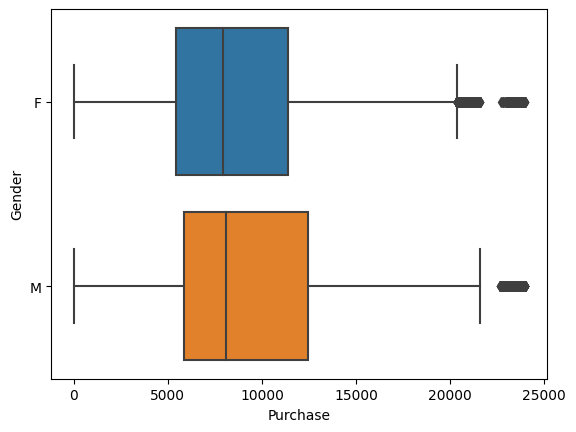

In [158]:
sns.boxplot(x=df["Purchase"],y=df["Gender"])

Median of purchase amount in both males and females is almost similar but males expenditure is silghtly more than female expenditure.

<Axes: xlabel='Age', ylabel='Mean_Purchase'>

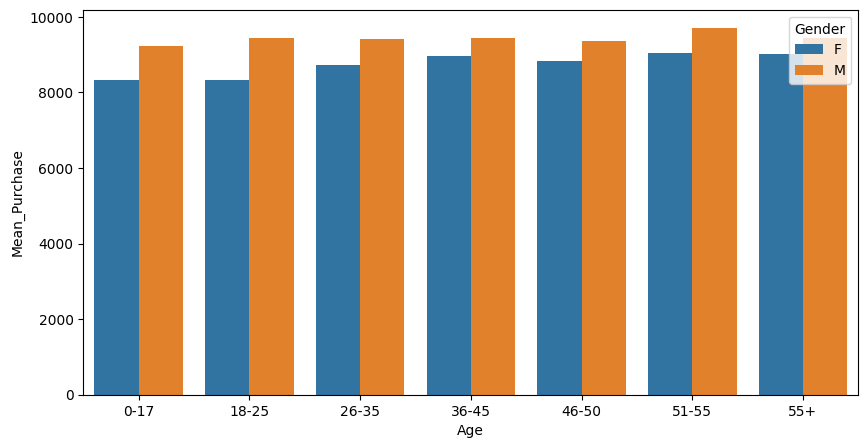

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_age_gender, x="Age", y="Mean_Purchase",hue="Gender")



*   Mean expenditure for different age groups aren't very varying but highest spending age group is 51-55 age group.
*   Mean expenditure of female is lesser than males in each age group.



<Axes: xlabel='Mean_Purchase', ylabel='Marital_Status'>

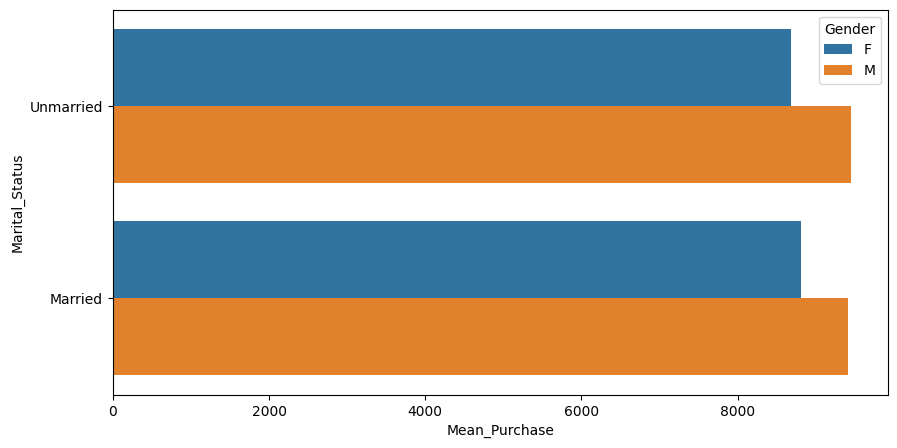

In [141]:
df_gender_maritalS_mean = df.groupby(["Gender","Marital_Status"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase", aggfunc="mean"))
df_gender_maritalS_mean.reset_index(inplace=True)
df_gender_maritalS_mean["Marital_Status"].replace([0,1],["Unmarried","Married"],inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(data=df_gender_maritalS_mean,x="Mean_Purchase",y="Marital_Status",hue="Gender")




*   The above table tells that males have higher mean expenditure than females irrespective of being married or un-married.
*   An unmarried male has the highest expenditure among all the categories



<Axes: xlabel='Purchase', ylabel='City_Category'>

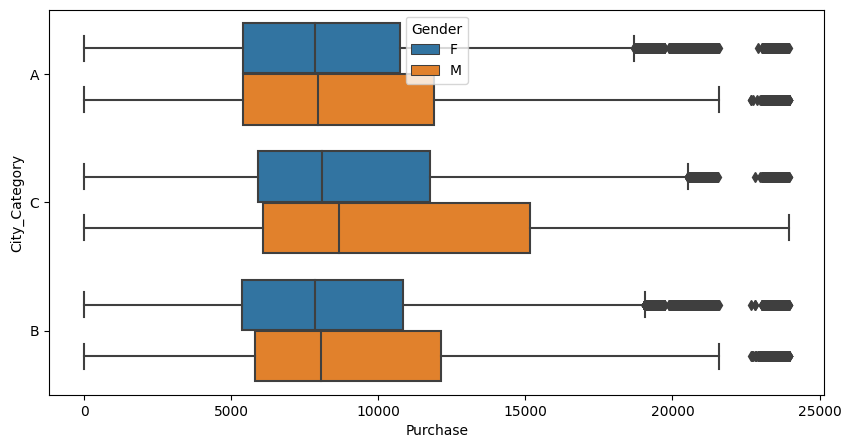

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y="City_Category",x="Purchase",hue="Gender")

Its clearly visible that city category "C" has highest median of purchase amounts in both male and female categories.

<Axes: xlabel='Occupation', ylabel='Purchase'>

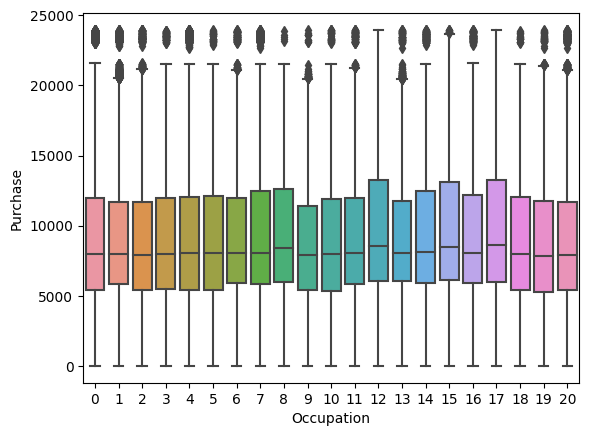

In [137]:
sns.boxplot(data=df,x="Occupation",y="Purchase")

As observed in the non-graphical analysis the occupation with highest mean purchase was 17th numbered occupation and here also 17th numbered occupation has the highest median among all the occupation.

<Axes: xlabel='Product_Category', ylabel='Mean_Purchase'>

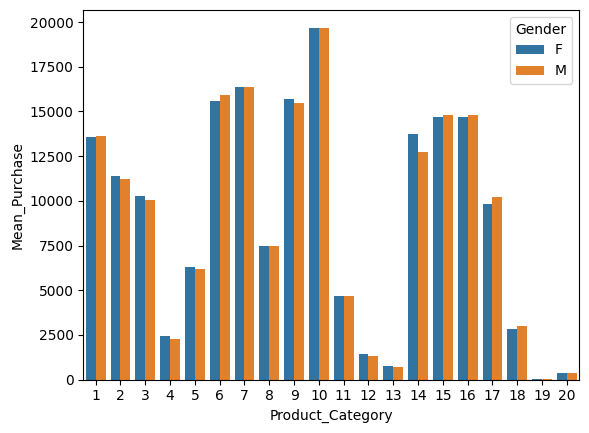

In [155]:
df_prod_gender_mean = df.groupby(["Product_Category","Gender"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase",aggfunc="mean"))
df_prod_gender_mean.reset_index(inplace=True)
sns.barplot(data=df_prod_gender_mean,x="Product_Category",y="Mean_Purchase",hue="Gender")



*   Product category 10 is spent upon the most by both males and females.
*   Product category 19 has negligible amount of purchase.



<Axes: xlabel='Product_Category', ylabel='Mean_Purchase'>

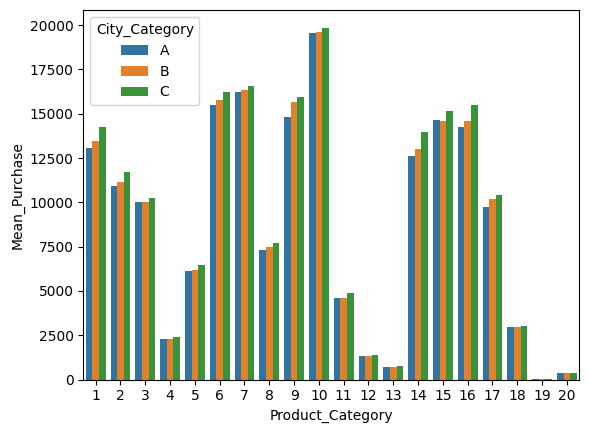

In [156]:
df_prod_city_mean = df.groupby(["Product_Category","City_Category"]).agg(Mean_Purchase=pd.NamedAgg(column="Purchase",aggfunc="mean"))
df_prod_city_mean.reset_index(inplace=True)
sns.barplot(data=df_prod_city_mean,x="Product_Category",y="Mean_Purchase",hue="City_Category")

City category "C" has highest mean purchase in almost all Product Categories which agrees with the fact that the city category "C" has highest mean purchase in total compared to other categories as observed in the non-graphical analysis. 

# Correlation among variables.

In [87]:
df_copy = df.drop(columns=["User_ID","Product_ID"]).copy()
df_copy["Gender"].replace(['M', 'F'], [1, 0], inplace=True)
df_copy["Age"].replace(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],[0,6,2,4,5,3,1], inplace=True)
df_copy["City_Category"].replace(["A","B","C"], [0,1,2], inplace=True)
df_copy["Stay_In_Current_City_Years"].replace(["0","1","2","3","4+"],[0,1,2,3,4],inplace=True)
df_copy


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4,0,8,7969
...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,368
550064,0,2,1,2,3,0,20,371
550065,0,2,15,1,4,1,20,137
550066,0,6,1,2,2,0,20,365


In [88]:
df_copy.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


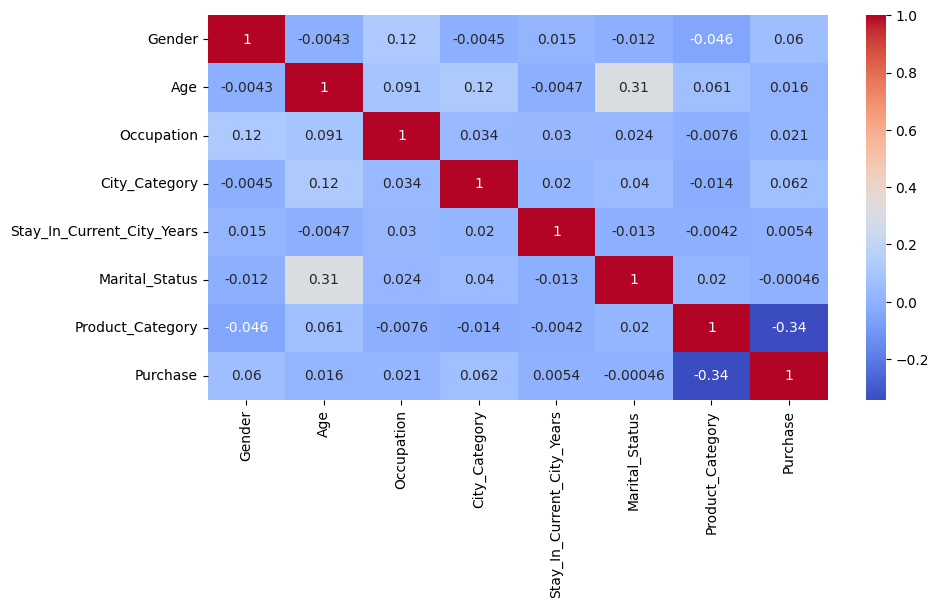

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr(),annot=True,cmap="coolwarm")
plt.show()

All the variables are almost negatively correlated or are very small values. Negative correlation for example means that, since age and gender have "-0.0043" as correlation which implies that there are more younger people and with increasing age number of perople are decreasing.

In [90]:
df_copy2 = df.drop(columns=["User_ID"]).copy()
df_copy2["Age"].replace(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],[0,6,2,4,5,3,1], inplace=True)
df_copy2["City_Category"].replace(["A","B","C"], [0,1,2], inplace=True)
df_copy2["Stay_In_Current_City_Years"].replace(["0","1","2","3","4+"],[0,1,2,3,4],inplace=True)
df_copy2

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,P00069042,F,0,10,0,2,0,3,8370
1,P00248942,F,0,10,0,2,0,1,15200
2,P00087842,F,0,10,0,2,0,12,1422
3,P00085442,F,0,10,0,2,0,12,1057
4,P00285442,M,6,16,2,4,0,8,7969
...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,5,13,1,1,1,20,368
550064,P00375436,F,2,1,2,3,0,20,371
550065,P00375436,F,2,15,1,4,1,20,137
550066,P00375436,F,6,1,2,2,0,20,365


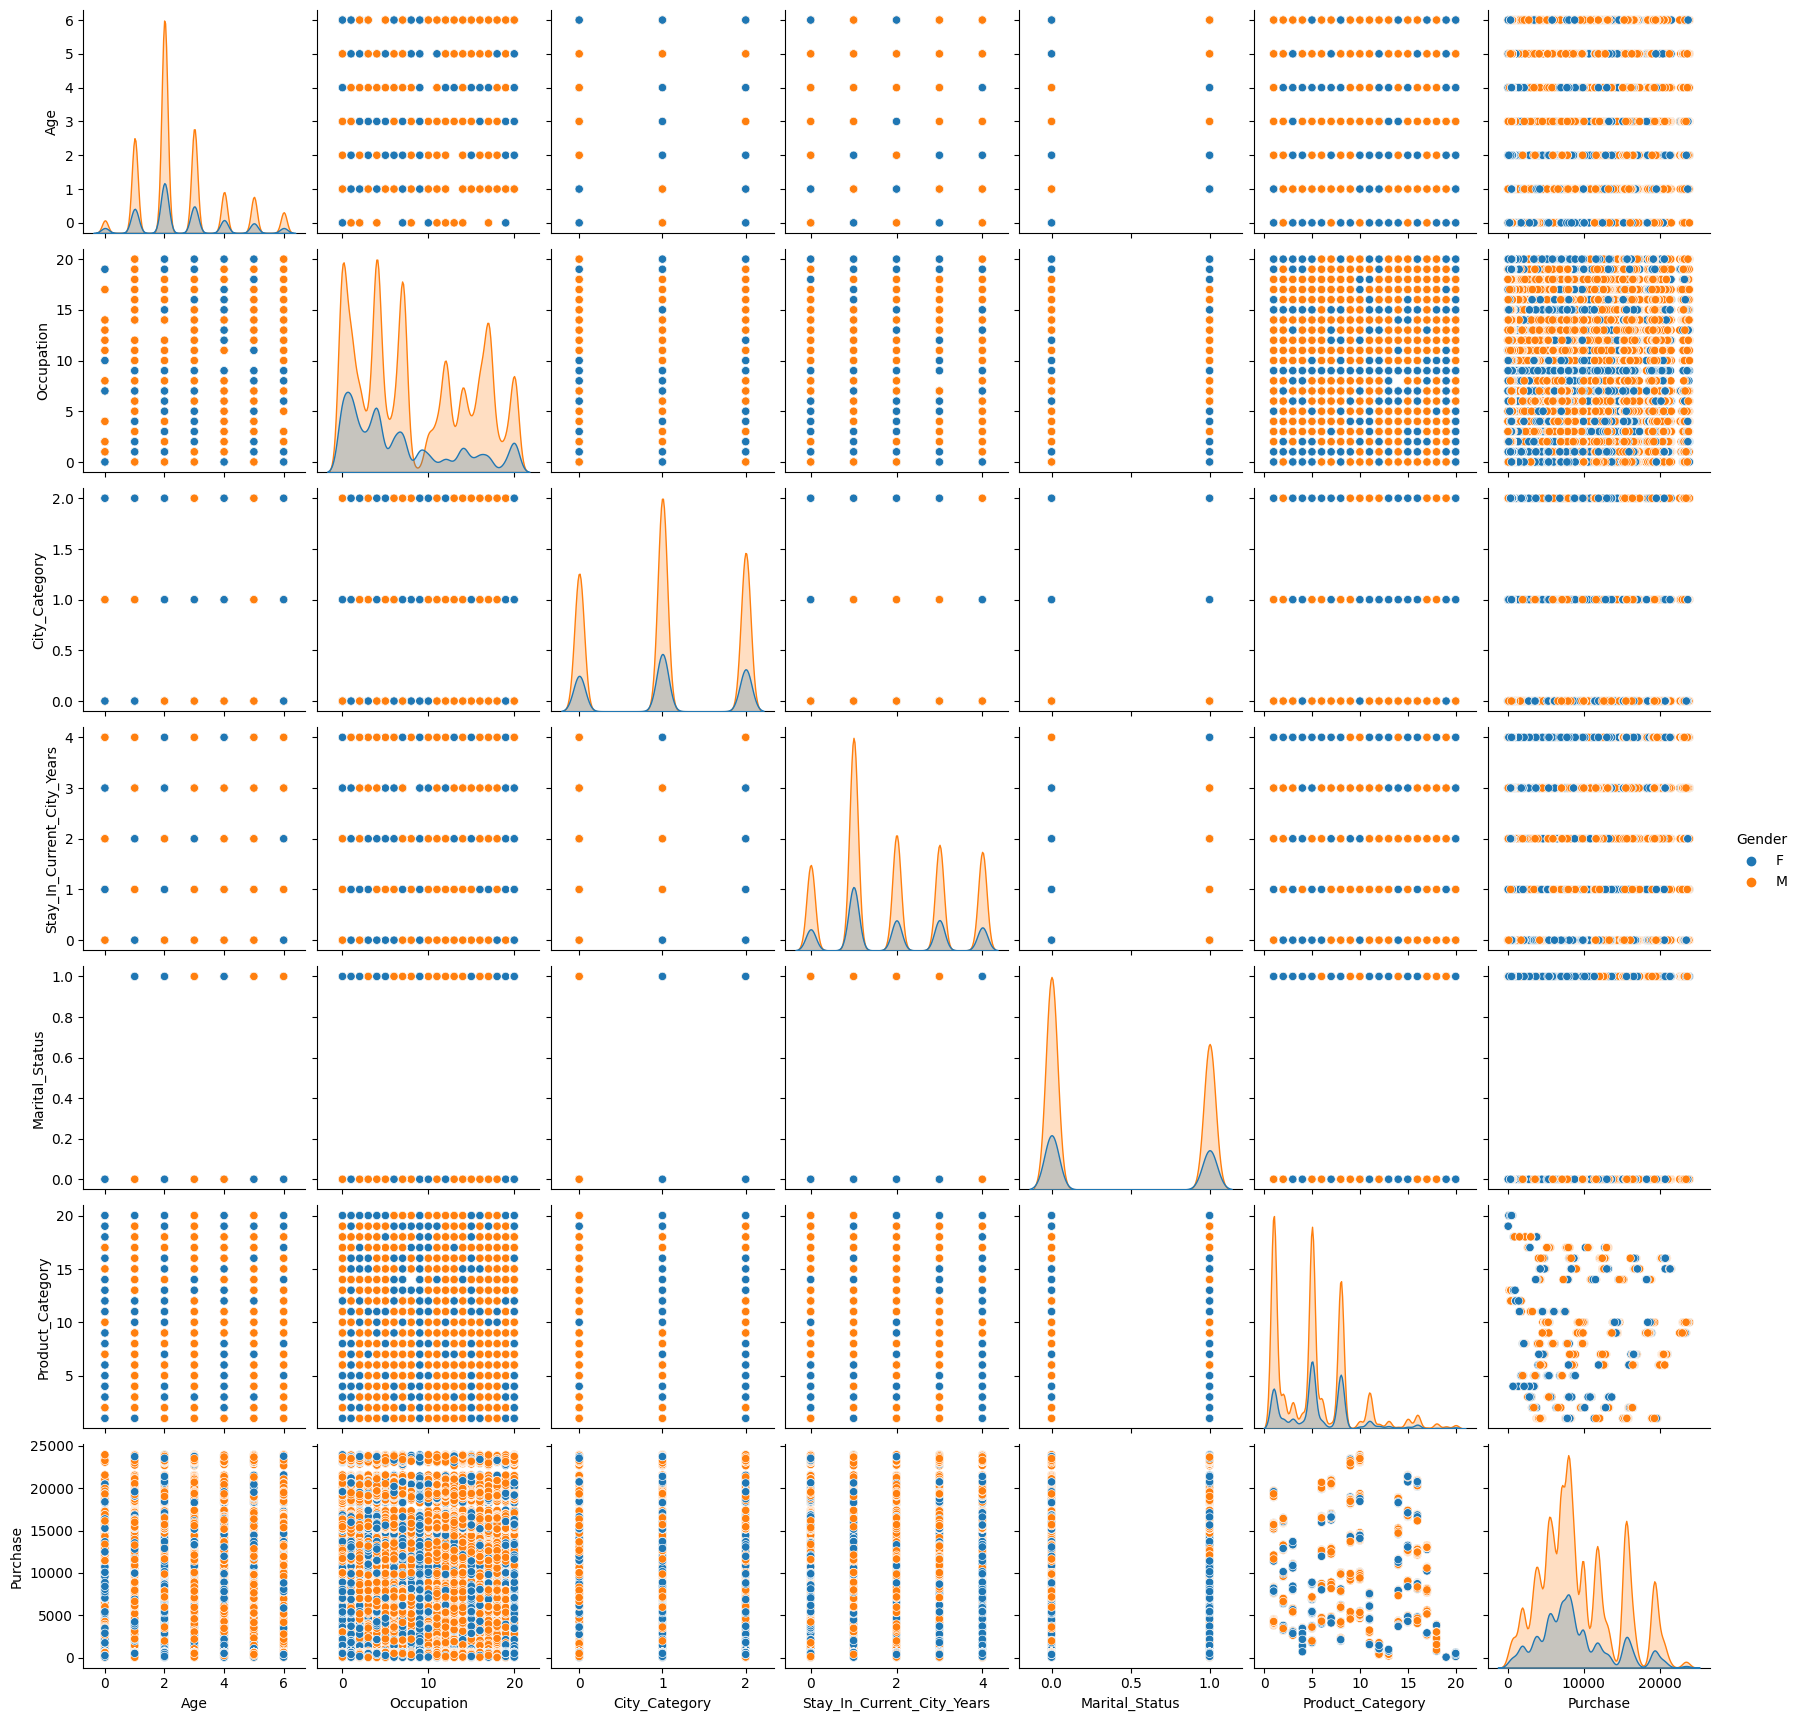

In [161]:
sns.pairplot(data = df_copy2,hue="Gender")

All the variables are uniformally scattered/distributed with respect to each other. But there are some correlation - 

1.   Highest purchase amounts are observed for product categories 9 and 10.
2.   In city category "C" the males usually make bigger transactions than females while in other city categories it is unformally distributed.

